In [1]:
#importing packages and tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.svm import LinearSVR

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from pprint import pprint
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
import sys
print(sys.getrecursionlimit())
sys.setrecursionlimit(10000)

1000


## Preprocessing

This section just reads the data and combines it into a single dataframe before randomly splitting into training and test sets (x - inputs, y- outputs).

TODO:
- the data extraction is hardcoded - need to come up with something more general for the nxn case. code to read data from files should work provided the correct file paths. 
- file paths here are hardcoded. not sure why the relative file paths were not working correctly. did not have time to fix

In [2]:
#import data 
coil1 = pd.read_csv("/content/2x2-1.csv", names=['Freq', 'Phase', 'Distance', 'x1','x2','x3','x4','y1','y2','y3','y4','z1','z2','z3','z4'], skiprows=1)
coil2 = pd.read_csv("/content/2x2-2.csv", names=['Freq', 'Phase', 'Distance', 'x1','x2','x3','x4','y1','y2','y3','y4','z1','z2','z3','z4'], skiprows=1)
coil3 = pd.read_csv("/content/2x2-3.csv", names=['Freq', 'Phase', 'Distance', 'x1','x2','x3','x4','y1','y2','y3','y4','z1','z2','z3','z4'], skiprows=1)

In [3]:
#starting location
x = 0
y = 0
z = 0
points = coil1.shape[0]
print(points)
#x lines
x1 = coil1[['Distance']]
x1['y'] = 0
x1['z'] = 0
x1.columns = ['x', 'y', 'z']

x2 = x1.copy()
x2['y'] = x2['y'] + 60
x3 = x1.copy()
x3['z'] = x3['z'] + 60
x4 = x2.copy()
x4['z'] = x4['z'] + 60

x1_concat = pd.concat([x1,coil1['x1'],coil2['x1'],coil3['x1']],axis=1)
x1_concat.columns = ['x', 'y', 'z', 'coil1','coil2','coil3']

x2_concat = pd.concat([x2,coil1['x2'],coil2['x2'],coil3['x2']],axis=1)
x2_concat.columns = ['x', 'y', 'z', 'coil1','coil2','coil3']

x3_concat = pd.concat([x3,coil1['x3'],coil2['x3'],coil3['x3']],axis=1)
x3_concat.columns = ['x', 'y', 'z', 'coil1','coil2','coil3']

x4_concat = pd.concat([x4,coil1['x4'],coil2['x4'],coil3['x4']],axis=1)
x4_concat.columns = ['x', 'y', 'z', 'coil1','coil2','coil3']

#y lines
y1 = x1[['y']]
y1['a'] = coil1[['Distance']]
y1['b'] = 0
y1.columns = ['x', 'y', 'z']
print(y1.columns)

y2 = y1.copy()
y2['x'] = y2['x'] + 60
y3 = y1.copy()
y3['z'] = y3['z'] + 60
y4 = y2.copy()
y4['z'] = y4['z'] + 60

y1_concat = pd.concat([y1,coil1['y1'],coil2['y1'],coil3['y1']],axis=1)
y1_concat.columns = ['x', 'y', 'z', 'coil1','coil2','coil3']

y2_concat = pd.concat([y2,coil1['y2'],coil2['y2'],coil3['y2']],axis=1)
y2_concat.columns = ['x', 'y', 'z', 'coil1','coil2','coil3']

y3_concat = pd.concat([y3,coil1['y3'],coil2['y3'],coil3['y3']],axis=1)
y3_concat.columns = ['x', 'y', 'z', 'coil1','coil2','coil3']

y4_concat = pd.concat([y4,coil1['y4'],coil2['y4'],coil3['y4']],axis=1)
y4_concat.columns = ['x', 'y', 'z', 'coil1','coil2','coil3']

#z lines
z4 = x1[['y']]
z4['a'] = 0
z4['b'] = coil1[['Distance']]
z4.columns = ['x', 'y', 'z']

z1 = z4.copy()
z1['x'] = z1['x'] + 60
z3 = z4.copy()
z3['y'] = z3['y'] + 60
z2 = z3.copy()
z2['x'] = z2['x'] + 60

z1_concat = pd.concat([z1,coil1['z1'],coil2['z1'],coil3['z1']],axis=1)
z1_concat.columns = ['x', 'y', 'z', 'coil1','coil2','coil3']

z2_concat = pd.concat([z2,coil1['z2'],coil2['z2'],coil3['z2']],axis=1)
z2_concat.columns = ['x', 'y', 'z', 'coil1','coil2','coil3']

z3_concat = pd.concat([z3,coil1['z3'],coil2['z3'],coil3['z3']],axis=1)
z3_concat.columns = ['x', 'y', 'z', 'coil1','coil2','coil3']

z4_concat = pd.concat([z4,coil1['z4'],coil2['z4'],coil3['z4']],axis=1)
z4_concat.columns = ['x', 'y', 'z', 'coil1','coil2','coil3']
print(z4_concat)
print(z4_concat.columns)

101
Index(['x', 'y', 'z'], dtype='object')
     x  y          z     coil1     coil2     coil3
0    0  0   0.000000  0.008356  0.008818  0.002750
1    0  0   0.600004  0.008216  0.008874  0.002756
2    0  0   1.200008  0.008099  0.008909  0.002762
3    0  0   1.800012  0.008004  0.008923  0.002769
4    0  0   2.400016  0.007910  0.008936  0.002775
..  .. ..        ...       ...       ...       ...
96   0  0  57.600384  0.002929  0.008910  0.002736
97   0  0  58.200388  0.002899  0.008901  0.002728
98   0  0  58.800392  0.002868  0.008892  0.002720
99   0  0  59.400396  0.002838  0.008883  0.002712
100  0  0  60.000400  0.002808  0.008874  0.002705

[101 rows x 6 columns]
Index(['x', 'y', 'z', 'coil1', 'coil2', 'coil3'], dtype='object')


In [4]:
df = pd.concat([x1_concat,x2_concat,x3_concat,x4_concat,
                   y1_concat,y2_concat,y3_concat,y4_concat,
                   z1_concat,z2_concat,z3_concat,z4_concat])

In [5]:
x_train, x_test, y_train, y_test = train_test_split(df[["coil1","coil2","coil3"]], df[['x','y','z']], test_size=0.3)

In [6]:
print(x_train)

        coil1     coil2     coil3
32   0.009688  0.002836  0.003824
36   0.005457  0.002817  0.009999
96   0.002929  0.008910  0.002736
31   0.009381  0.009111  0.003608
48   0.004689  0.009466  0.002892
..        ...       ...       ...
100  0.002808  0.008874  0.002705
58   0.002918  0.002893  0.005224
46   0.002931  0.009202  0.004522
89   0.003141  0.008970  0.002797
28   0.009443  0.005874  0.002876

[848 rows x 3 columns]


In [7]:
print(y_train)

             x          y          z
32   60.000000  19.200128   0.000000
36   60.000000  60.000000  21.600144
96    0.000000   0.000000  57.600384
31    0.000000  18.600124   0.000000
48    0.000000   0.000000  28.800192
..         ...        ...        ...
100   0.000000   0.000000  60.000400
58   60.000000  34.800232  60.000000
46    0.000000  27.600184  60.000000
89    0.000000   0.000000  53.400356
28   16.800112   0.000000   0.000000

[848 rows x 3 columns]


## Deep Neural Network - DNN

Defines model structure, trains and evaluates DNN. To change the model structure edit the define_multi_output_model function. Mse for training and test tests reported.

Hyperparamters to tune:
- number of layers
- layer width
- activation function
- loss function
- optimizer

Note that this version of the model is not optimal. Need to play around with the above parameters more. As a starting point the model may not not be complex enough.

In [ ]:
#optimization DNN algorithm
layer_widths = [50,60,70,80,90,100,110,120]
activations = ["relu","tanh"]
layer_counts = [5,6,7,9,8,9,10,11,12]
#variables to save most optimal case
mse_actual1 = 100 #actual training mse
mse_actual2 = 100 #actual testing mse 
accuracy_actual = 0
mean_actual = 100 #takes mean to make sure we get best data 
layer_width_actual = 0
activation_actual = ""
layer_count_actual = 0
for layer_width in layer_widths: #testing sample size of diff widths
  #mse temp is 0 to compare mse vals and accuracy to get most optimal model output
  mse_temp1 = 0 #training
  mse_temp2 = 0 #testing
  accuracy_temp = 0 #accuracy temp
  for activation2 in activations: #testing with activation small sample size
    for layer_count in layer_counts:
      model = Sequential() #creates new model wherever there is a first change in a test case(last loop)
      i = 0 #iterative value
      while i <= layer_count: #iterates for all different counts of layers
        if i == layer_count: #gets all layers added, includes count to compile model for each case
          model.compile(loss='mse', optimizer='adam',  metrics=['accuracy']) #compiles model
          model.summary()
          model.fit(x_train,y_train,epochs=200,batch_size=10,verbose=1) #fits model
          #training
          prediction_train = model.predict(x_train)
          prediction_test = model.predict(x_test)
          dnn_MSE_train = mean_squared_error(y_train, prediction_train)
          dnn_MSE_test = mean_squared_error(y_test, prediction_test)
          #mse, accuracy printed
          print("MSE on Training Data: " + str(dnn_MSE_train))
          print("MSE on Test Data: " + str(dnn_MSE_test))
          score = model.evaluate(x_test, y_test) #uses evaluate to get accuracy
          print('Test loss (MSE):', score[0])
          print('Test accuracy:', score[1])
          #sets variables of current iteration to temp
          mse_temp1 = dnn_MSE_train
          mse_temp2 = dnn_MSE_test
          accuracy_temp = score[1]
          if mse_temp2 < mse_actual2: #if we get better results
            if accuracy_temp > accuracy_actual: #if we have better accuracy
              accuracy_actual = accuracy_temp #sets accuracy, we want most accurate model possible
              mse_actual1 = dnn_MSE_train
              mse_actual2 = dnn_MSE_test
              #sets all variables so we can print at end to determine most optimal model
              layer_width_actual = layer_width
              activation_actual = activation2
              layer_count_actual = layer_count
              #prints optimal model results           
              print(layer_width_actual)
              print(activation_actual)
              print(layer_count_actual)
          i += 1
        elif i == layer_count-1: #last layer
          model.add(layers.Flatten()) #flattens data to get into single vector for last layer
          model.add(Dense(3)) #since data is 3d vector, last layer is width of 3
          i += 1
        else: #all layers until last layer, so we count exactly how many layers
          model.add(Dense(layer_width, input_dim = 3, kernel_initializer='he_uniform', activation=activation2))
          i += 1
#prints optimal model results           
print(layer_width_actual)
print(activation_actual)
print(layer_count_actual)
z = 0
#builds optimal structure of model again 
while z <= layer_count_actual:
    if z == layer_count_actual:
      model.compile(loss='mse', optimizer='adam',  metrics=['accuracy']) #compiles model
      model.fit(x_train,y_train,epochs=200,batch_size=10,verbose=1) #fits model
      #training
      prediction_train = model.predict(x_train)
      prediction_test = model.predict(x_test)
      dnn_MSE_train = mean_squared_error(y_train, prediction_train)
      dnn_MSE_test = mean_squared_error(y_test, prediction_test)
      #mse, accuracy printed
      print("MSE on Training Data: " + str(dnn_MSE_train))
      print("MSE on Test Data: " + str(dnn_MSE_test))
      score = model.evaluate(x_test, y_test) #uses evaluate to get accuracy
      print('Test loss (MSE):', score[0])
      print('Test accuracy:', score[1]) 
      z += 1 
    elif z == layer_count_actual-1: #acounts for last layer
      model.add(layers.Flatten()) #flattens data to get into single vector for last layer
      model.add(Dense(3)) #since data is 3d vector, last layer is width of 3 
      z += 1
    else: #adds optimal configurations for all layers
      model.add(Dense(layer_width_actual, input_dim = 3, kernel_initializer='he_uniform', activation=activation_actual))
      z += 1


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                200       
_________________________________________________________________
dense_6 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_7 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_8 (Dense)              (None, 50)                2550      
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 50)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 153       
Total params: 8,003
Trainable params: 8,003
Non-trainable params: 0
____________________________________________________

## Tree Based Methods

Trains and evaluates 2 tree based models (extra trees and random forest).

Hyperparamters to tune:
- see documentation from sklearn

Note that this version of the model is not optimal. Need to play around with the above parameters more.

In [ ]:
#Extra Trees baselin model
model2 = ExtraTreesRegressor(n_estimators=102, random_state=15,max_leaf_nodes=100000,oob_score=True,bootstrap=True).fit(x_train, y_train) #fitted to shape of dat
prediction_train_model2 = model2.predict(x_train)
prediction_test_model2 = model2.predict(x_test)
from sklearn.metrics import accuracy_score
model2_MSE_train = mean_squared_error(y_train, prediction_train_model2)
model2_MSE_test = mean_squared_error(y_test, prediction_test_model2)
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
print(model2.get_params().keys()) #geting keys for 

#Random Forest
rf_reg = RandomForestRegressor(max_depth=100, random_state=0,max_leaf_nodes=1000000).fit(x_train, y_train) #fitted with respect to shape of data
prediction_train_rf = rf_reg.predict(x_train)
prediction_test_rf = rf_reg.predict(x_test)
rf_MSE_train = mean_squared_error(y_train, prediction_train_rf)
rf_MSE_test = mean_squared_error(y_test, prediction_test_rf)

#Prediction Accuracy
print("MSE of Extra Trees Regressor on Training Data: " + str(model2_MSE_train))
print("MSE of Extra Trees Regressor on Test Data: " + str(model2_MSE_test) + "\n")

print("MSE of Random Forest Regressor on Training Data: " + str(rf_MSE_train))
print("MSE of Random Forest Regressor on Test Data: " + str(rf_MSE_test))

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])
MSE of Extra Trees Regressor on Training Data: 0.011840510100037302
MSE of Extra Trees Regressor on Test Data: 0.06838713375625692

MSE of Random Forest Regressor on Training Data: 0.02072355596310749
MSE of Random Forest Regressor on Test Data: 0.14044873059570834


In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5,10,17,26]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,9,16,25]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 9, 16, 25],
 'min_samples_split': [2, 5, 10, 17, 26],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=102,random_state = 15)#builds model as test
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())
pprint(model2.get_params())


Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 102,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 15,
 'verbose': 0,
 'warm_start': False}
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': 100000,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 102,
 'n_jobs': None,
 'oob_score': True,
 'random_state': 15,
 'verbose': 0,
 'warm_start': False}


In [ ]:
# Use the random grid to search for best hyperparameters
# base models created
rf = RandomForestRegressor()
et = ExtraTreesRegressor()
# Random search of parameters, using 3 fold cross validation, 
# Searches across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=15, n_jobs = -1)
et_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=15, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)
et_random.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   57.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_random.best_params_ #calling best possible params of rf 

{'bootstrap': True,
 'max_depth': 60,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [ ]:
rf_random.best_estimator_ #uses best estimator

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=60, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
et_random.best_estimator_ #uses best estimator

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=60, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
et_random = ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=60, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) #based on best estimator
et_random.fit(x_train,y_train) #fitted

ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                    max_depth=60, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=1000, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
rf_random = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=60, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) #building random forest model based on best estimators function
rf_random.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=60, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
#training rf
prediction_train_rf_random = rf_random.predict(x_train)
prediction_test_rf_random = rf_random.predict(x_test)

rf_random_MSE_train = mean_squared_error(y_train, prediction_train_rf_random)
rf_random_MSE_test = mean_squared_error(y_test, prediction_test_rf_random)
#MSE hypertuned rf
print("MSE of Random Forest Regressor on Training Data: " + str(rf_random_MSE_train))
print("MSE of Random Forest Regressor on Test Data: " + str(rf_random_MSE_test))
#training hypertuned et
prediction_train_et_random = et_random.predict(x_train)
prediction_test_et_random = et_random.predict(x_test)
#MSE hypertuned et 
et_random_MSE_train = mean_squared_error(y_train, prediction_train_et_random)
et_random_MSE_test = mean_squared_error(y_test, prediction_test_et_random)

print("MSE of Extra Trees Regressor on Training Data: " + str(et_random_MSE_train))
print("MSE of Extra Trees Regressor on Test Data: " + str(et_random_MSE_test))

MSE of Random Forest Regressor on Training Data: 0.017327658927935606
MSE of Random Forest Regressor on Test Data: 0.09648504403735247
MSE of Extra Trees Regressor on Training Data: 0.00481990570495884
MSE of Extra Trees Regressor on Test Data: 0.027100764051087495


In [ ]:
#building optimal model
rf_random = RandomForestRegressor(bootstrap=True,
 max_depth=60,
 max_features='auto',
 min_samples_leaf=1,
 min_samples_split=2,
 n_estimators=1000) #from best params
rf_random.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=60, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
#hypertuned rf training
prediction_train_rf_random = rf_random.predict(x_train)
prediction_test_rf_random = rf_random.predict(x_test)
#MSE
rf_random_MSE_train = mean_squared_error(y_train, prediction_train_rf_random)
rf_random_MSE_test = mean_squared_error(y_test, prediction_test_rf_random)
#MSE Printed
print("MSE of Random Forest Regressor on Training Data: " + str(rf_random_MSE_train))
print("MSE of Random Forest Regressor on Test Data: " + str(rf_random_MSE_test))

MSE of Random Forest Regressor on Training Data: 0.017327658927935606
MSE of Random Forest Regressor on Test Data: 0.09648504403735247


In [ ]:
def evaluate(model, x_train_input, x_test_input): #function for evaluating the performance
    predictions = model.predict(x_train_input)
    errors = abs(predictions - x_test_input) #error count
    mape = 100 * np.mean(errors / x_test_input)
    accuracy = 100 - mape
    arr = [mape,accuracy]
    np.int64(arr)
    print(arr[0])
    #print('{:15}'.format('{}'.format(arr)))
    print('Model Performance')
    #print(accuracy)
    #print(mape)
    #print('Average Error: {:0.4f} degrees.'.format(np.mean(errors))) #mean erroe
    #print('Accuracy = {:0.2f}%.'.format(accuracy)) #gives accuracy
    
    return accuracy
#fits new model    
base_model = RandomForestRegressor(n_estimators = 102, random_state = 15)
base_model.fit(x_train,y_train)
base_accuracy = evaluate(base_model, x_test, y_test)

x    inf
y    inf
z    inf
dtype: float64
Model Performance


## Support Vector Regression

Trains, evaluates and selects from support vector regression models.

Hyperparamters to tune:
- search space - the code uses grid search to optimize along listed hyperparameters. Update the params dictionary to expand or narrow the hyperparameters to search along.
- cross validation parameter - currently uses 5 fold cross validation

Probably can use the code here as a template to optimize choosing the best model for other methods.

In [ ]:
degrees = [2,3,4,5,6,7,8]
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5]

params = {'estimator__C':alphas, 'estimator__kernel':['linear','poly','sigmoid','rbf'], 'estimator__degree': degrees }   #'gamma': ['scale','auto']
svr = SVR(max_iter=500000) #creates svr
print(MultiOutputRegressor(svr).get_params().keys()) #gets params
param_grid2 = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf'], 'estimator_degree': degrees} #all parameters to test

gs_svr = GridSearchCV(estimator=MultiOutputRegressor(svr), 
                      param_grid=params, 
                      cv=5,
                      verbose=3,
                      n_jobs=-1) #builds model using GridSearchCV

gs_svr = gs_svr.fit(x_train,y_train) #fits to data for grid search

dict_keys(['estimator__C', 'estimator__cache_size', 'estimator__coef0', 'estimator__degree', 'estimator__epsilon', 'estimator__gamma', 'estimator__kernel', 'estimator__max_iter', 'estimator__shrinking', 'estimator__tol', 'estimator__verbose', 'estimator', 'n_jobs'])
Fitting 5 folds for each of 308 candidates, totalling 1540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:   54.4s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 1148 tasks      | elapsed: 24.9min
[Parallel(n_jobs=-1)]: Done 1540 out of 1540 | elapsed: 72.5min finished


In [ ]:
print(gs_svr.best_params_)
print(gs_svr.best_estimator_)

best_model = gs_svr.best_estimator_ #gets best estimate, can use for final prediction

{'estimator__C': 10000.0, 'estimator__degree': 2, 'estimator__kernel': 'rbf'}
MultiOutputRegressor(estimator=SVR(C=10000.0, cache_size=200, coef0=0.0,
                                   degree=2, epsilon=0.1, gamma='scale',
                                   kernel='rbf', max_iter=500000,
                                   shrinking=True, tol=0.001, verbose=False),
                     n_jobs=None)


In [ ]:
prediction_train_svr = best_model.predict(x_train)
prediction_test_svr = best_model.predict(x_test)

svr_MSE_train = mean_squared_error(y_train, prediction_train_svr)
svr_MSE_test = mean_squared_error(y_test, prediction_test_svr)

print("MSE of Best SVR on Training Data: " + str(svr_MSE_train))
print("MSE of Best SVR on Test Data: " + str(svr_MSE_test))

MSE of Best SVR on Training Data: 0.04734316006366728
MSE of Best SVR on Test Data: 0.04831445222044061


## Summary of Results

In [ ]:
methods = ["DNN", "Extra Trees", "Random Forest", "SVR"]
train = [dnn_MSE_train, et_MSE_train, rf_MSE_train, svr_MSE_train]
test = [dnn_MSE_test, et_MSE_test, rf_MSE_test, svr_MSE_test]
d = {"Methods":methods, "MSE train":train, "MSE test":test}
df_results = pd.DataFrame(d)
df_results

NameError: ignored

## Misc

code for some metrics that dr. sideris wanted. not essential to run predictions

In [ ]:
x_train

,coil1,coil2,coil3
4,0.002824,0.008393,0.002724
86,0.002926,0.003045,0.009296
72,0.009059,0.009267,0.005667
84,0.009316,0.002789,0.006905
63,0.003996,0.002917,0.009620
...,...,...,...
92,0.008527,0.008834,0.007339
38,0.002964,0.002929,0.004080
50,0.002930,0.004468,0.002945
97,0.002835,0.008444,0.008955


In [ ]:
y_train['x']

4      2.400016
86    51.600344
72     0.000000
84    60.000000
63    60.000000
        ...    
92     0.000000
38    60.000000
50    30.000200
97     0.000000
63    60.000000
Name: x, Length: 848, dtype: float64

In [ ]:
df1 = pd.DataFrame(prediction_test_et, columns = ['x','y','z'])
df1.head()

,x,y,z
0,60.000000,21.684145,60.000000
1,40.164268,0.000000,0.000000
2,60.000000,25.980173,0.000000
3,0.000000,60.000000,29.640198
4,19.140128,0.000000,60.000000


In [ ]:
df1 = pd.DataFrame(prediction_test_et, columns = ['x','y','z'])

In [ ]:
y_test.to_csv(path_or_buf='labels.csv')

In [ ]:
df1.to_csv(path_or_buf='predictions.csv')

In [ ]:
prediction_test_et

array([[60.        , 21.68414456, 60.        ],
       [40.16426776,  0.        ,  0.        ],
       [60.        , 25.9801732 ,  0.        ],
       ...,
       [60.        , 60.        , 14.9700998 ],
       [60.        , 20.61613744, 60.        ],
       [60.        , 48.70232468, 60.        ]])

In [ ]:
y_test_array = y_test.to_numpy()
y_test_array

array([[60.      , 21.600144, 60.      ],
       [40.200268,  0.      ,  0.      ],
       [60.      , 26.400176,  0.      ],
       ...,
       [60.      , 60.      , 15.0001  ],
       [60.      , 20.400136, 60.      ],
       [60.      , 48.600324, 60.      ]])

In [ ]:
from numpy import linalg as LA
from statistics import mean

error = []
x1 = prediction_test_et
x2 = y_test_array

labels1 = []
labels2 = []

for i in range(len(y_test_array)):
    p1 = x1[i]
    p2 = x2[i]

    vector = [p1[0] - p2[0], p1[1] - p2[1], p1[2] - p2[2]]
    n = LA.norm(vector)
    error.append(n)
    
error.sort()
mean(error)

0.16229530624795396

# ***Building Scatter Plot*** 

In [ ]:
# importing mplot3d toolkits
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'Vertical Distance (mm)')

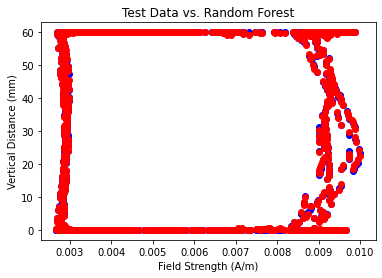

In [ ]:
#plot of random forest output and actual
plt.scatter(x_test, y_test, color='blue') #base
plt.scatter(x_test,prediction_test_rf,color="red") #rf
plt.title('Test Data vs. Random Forest')
plt.xlabel('Field Strength (A/m)')
plt.ylabel('Vertical Distance (mm)')

Text(0, 0.5, 'Vertical Distance (mm)')

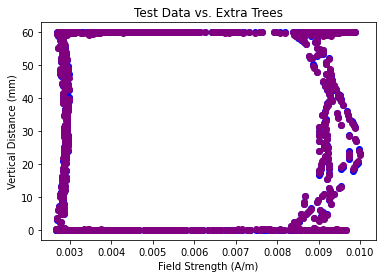

In [ ]:
#extra trees vs actual
plt.scatter(x_test, y_test, color='blue') #base
plt.scatter(x_test,prediction_test_model2,color="purple") #et
plt.title('Test Data vs. Extra Trees')
plt.xlabel('Field Strength (A/m)')
plt.ylabel('Vertical Distance (mm)')

Text(0, 0.5, 'Vertical Distance (mm)')

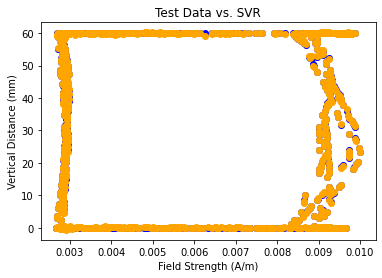

In [ ]:
#svr vs actual
plt.scatter(x_test, y_test, color='blue') #base
plt.scatter(x_test,prediction_test_svr,color="orange") #svr
plt.title('Test Data vs. SVR')
plt.xlabel('Field Strength (A/m)')
plt.ylabel('Vertical Distance (mm)')